<a href="https://colab.research.google.com/github/dixitritik17/ritik/blob/master/BrainTumorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip braintumor

Archive:  braintumor.zip
   creating: braintumor/
   creating: braintumor/train/
   creating: braintumor/train/no/
  inflating: braintumor/train/no/1 no.jpeg  
  inflating: braintumor/train/no/10 no.jpg  
  inflating: braintumor/train/no/11 no.jpg  
  inflating: braintumor/train/no/12 no.jpg  
  inflating: braintumor/train/no/13 no.jpg  
  inflating: braintumor/train/no/14 no.jpg  
  inflating: braintumor/train/no/15 no.jpg  
  inflating: braintumor/train/no/17 no.jpg  
  inflating: braintumor/train/no/18 no.jpg  
  inflating: braintumor/train/no/19 no.jpg  
  inflating: braintumor/train/no/2 no.jpeg  
  inflating: braintumor/train/no/20 no.jpg  
  inflating: braintumor/train/no/21 no.jpg  
  inflating: braintumor/train/no/22 no.jpg  
  inflating: braintumor/train/no/23 no.jpg  
  inflating: braintumor/train/no/24 no.jpg  
  inflating: braintumor/train/no/25 no.jpg  
  inflating: braintumor/train/no/26 no.jpg  
  inflating: braintumor/train/no/27 no.jpg  
  inflating: braintumor/train/

In [ ]:
train_path = "braintumor/train"
val_path = "braintumor/val"

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.layers import*
from keras.models import*
from keras.preprocessing import image 
import pickle
import cv2
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
model = Sequential()

inputSize = (224,224,3)
model.add(Conv2D(32, (3, 3), activation="relu",input_shape=inputSize))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='Adam', metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
train_datagen = image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('braintumor/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 196 images belonging to 2 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory('braintumor/val',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 57 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
                                training_set,
                                steps_per_epoch=6,
                                epochs=10,
                                validation_data= validation_set,
                                validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/6 [==============================] - 48s 8s/step - loss: 0.8898 - accuracy: 0.5962 - val_loss: 0.6663 - val_accuracy: 0.6140
Epoch 2/10
6/6 [==============================] - 45s 7s/step - loss: 0.6568 - accuracy: 0.5736 - val_loss: 0.6116 - val_accuracy: 0.6667
Epoch 3/10
6/6 [==============================] - 45s 7s/step - loss: 0.6391 - accuracy: 0.6466 - val_loss: 0.6712 - val_accuracy: 0.7193
Epoch 4/10
6/6 [==============================] - 45s 7s/step - loss: 0.6371 - accuracy: 0.6604 - val_loss: 0.6213 - val_accuracy: 0.6316
Epoch 5/10
6/6 [==============================] - 52s 9s/step - loss: 0.6083 - accuracy: 0.6368 - val_loss: 0.6262 - val_accuracy: 0.7544
Epoch 6/10
6/6 [==============================] - 45s 7s/step - loss: 0.6301 - accuracy: 0.6390 - val_loss: 0.6363 - val_accuracy: 0.6842
Epoch 7/10
6/6 [==============================] - 45s 7s/step - loss: 0.5708 - accuracy: 0.7164 - val_loss: 0.6108 - val_accuracy: 0.7719
Epoch 8/10
6/6 [==================

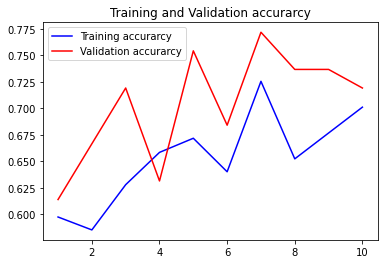

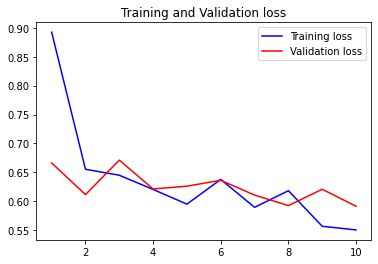

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()
